In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#


In [13]:
def plot_data_internal(X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#


def plot_data(X, y):
    xx, yy = plot_data_internal(X, y)
    plt.show()

##
# x: input to the logistic function
#
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
# w: current parameter values
#
def compute_average_ll(X, y, w):
    output_prob = logistic(np.dot(X, w))
    return np.mean(y * np.log(output_prob)
                   + (1 - y) * np.log(1.0 - output_prob))

##
# ll: 1d array with the average likelihood per data point, for each training
# step. The dimension of this array should be equal to the number of training
# steps.
#

def plot_ll(ll):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title('Plot Average Log-likelihood Curve')
    plt.show()

##
# X: 2d array with input features at which to compute predictions.
#
# (uses parameter vector w which is defined outside the function's scope)
#

def predict_for_plot(x):
    x_tilde = np.concatenate((x, np.ones((x.shape[ 0 ], 1 ))), 1)
    return logistic(np.dot(x_tilde, w))

##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
# predict: function that recives as input a feature matrix and returns a 1d
#          vector with the probability of class 1.


def plot_predictive_distribution(X, y, predict):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_predict = np.concatenate((xx.ravel().reshape((-1, 1)),
                                yy.ravel().reshape((-1, 1))), 1)
    Z = predict(X_predict)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()

##
# l: hyper-parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions


def expand_inputs(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

##
# x: 2d array with input features at which to compute the predictions
# using the feature expansion
#
# (uses parameter vector w and the 2d array X with the centers of the basis
# functions for the feature expansion, which are defined outside the function's
# scope)
#


def predict_for_plot_expanded_features(x):
    x_expanded = expand_inputs(l, x, W)
    x_tilde = np.concatenate((x_expanded, np.ones((x_expanded.shape[ 0 ], 1 ))), 1)
    return logistic(np.dot(x_tilde, w))

In [14]:
def train(ytrain, X_tilde_train, ytest, X_tilde_test, eta):
    beta = np.random.randn(X_tilde_train.shape[1])
    N= 1000#number of training loops
    lltrain = np.empty(N)
    lltest = np.empty(N)


    for n in range(N):
        lltrain[n] = compute_average_ll(X_tilde_train, ytrain, beta)
        lltest[n] = compute_average_ll(X_tilde_test, ytest, beta)
        #gradAscent = np.dot((ytrain - logistic(np.dot(X_tilde_train, beta))).T, X_tilde_train) 
        #originally I had the .T but after playing around I don't think this made any difference.
        gradAscent = (np.dot((ytrain - logistic(np.dot(X_tilde_train, beta))), X_tilde_train))
        beta = beta + eta * gradAscent

    
    plot_ll(lltrain)
    print(lltrain[N-1])
    plot_ll(lltest)
    print(lltest[N-1])
    return beta


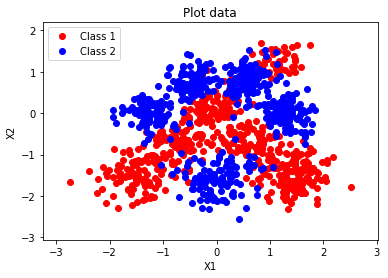

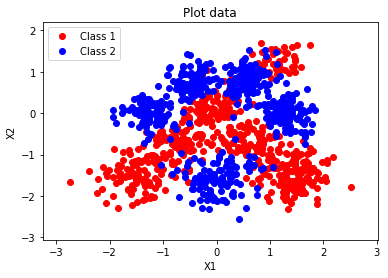

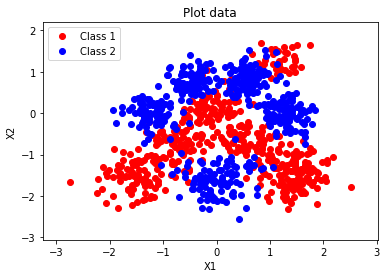

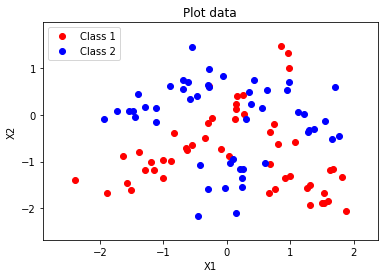

In [15]:
plot_data(X, y)


#Getting training data, in this case I'm just using the first 100 rows. It might be better to select random rows?
#Although if y is generated randomly then it shouldn't matter.
dataSplit = 900
Xtrain =  X[:dataSplit,:]
ytrain = y[:dataSplit]

Xtest = X[dataSplit:,:]
ytest = y[dataSplit:]

X_tilde_train = np.concatenate((Xtrain, np.ones((Xtrain.shape[0], 1))), 1)
X_tilde_test = np.concatenate((Xtest, np.ones((Xtest.shape[0], 1))), 1)

plot_data(Xtrain, ytrain)
plot_data(Xtest, ytest)
W=Xtrain

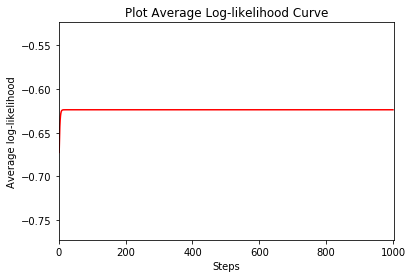

-0.62366006174


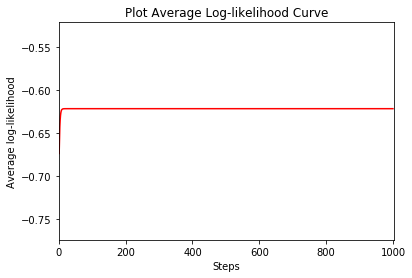

-0.621740395812


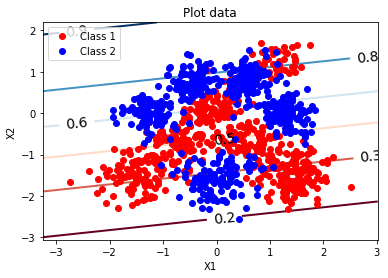

In [16]:
beta = train(ytrain, X_tilde_train, ytest, X_tilde_test, 0.001)
w = beta
#The first plot shows the Log-likelihood curve for the averaged training data where as the second plot shows the 
#Log-Likelihood for the test data. The average log-likelihood is calculated after each new beta is generated. 


#Should this be for X and y or for the training and test data separately.
plot_predictive_distribution(X, y, predict_for_plot)

In [17]:
#note that the y passed in will be ytrain or ytest not just y. 
def confusion_matrix(y, X_tilde, beta):
    #probability of y=1 given x and beta. If this is more that 0.5 we want to set y predicted to 1 and to zero otherwise
    p = logistic(np.dot(X_tilde, beta))
    y_predicted = np.round(p, decimals=0).astype(np.int)
    frac_true_neg = 0
    frac_true_pos = 0
    frac_false_neg = 0
    frac_false_pos = 0
    
    for n in range(y_predicted.shape[0]):
        if (y[n]==1) and (y_predicted[n]==1):
            frac_true_pos = frac_true_pos + 1
        elif (y[n]==0) and (y_predicted[n]==0):
            frac_true_neg = frac_true_neg + 1
        elif y[n]==1 and y_predicted[n]==0:
            frac_false_neg = frac_false_neg + 1
        elif y[n]==0 and y_predicted[n]==1:
            frac_false_pos = frac_false_pos + 1

    #the number of ones in y
    y_one = np.sum(y)
    print(y_one)
    #the number of zeros in ytrain
    y_zero = y.shape - y_one


    frac_true_neg = frac_true_neg/y_zero
    frac_true_pos = frac_true_pos/y_one
    frac_false_neg = frac_false_neg/y_one
    frac_false_pos = frac_false_pos/y_zero  

    print("Fraction of true negative:")
    print(frac_true_neg)
    print("Fraction of true positive")
    print(frac_true_pos)
    print("Fraction of false positive")
    print(frac_false_pos)
    print("Fraciton of false negative")
    print(frac_false_neg) 

In [18]:
#f) work out the probabilities for each data point in the training data and work out the confusion matrix
confusion_matrix(ytrain, X_tilde_train, beta)

445.0
Fraction of true negative:
[ 0.70769231]
Fraction of true positive
0.72808988764
Fraction of false positive
[ 0.29230769]
Fraciton of false negative
0.27191011236


In [19]:
#f) work out the probabilities for each data point in the test data and work out the confusion matrix
confusion_matrix(ytest, X_tilde_test, beta)

49.0
Fraction of true negative:
[ 0.7254902]
Fraction of true positive
0.65306122449
Fraction of false positive
[ 0.2745098]
Fraciton of false negative
0.34693877551


ytrain: (900,)   Xtildetrainexpand: (900, 901)   ytest: (100,)     X_tilde_test_expand(100, 901)


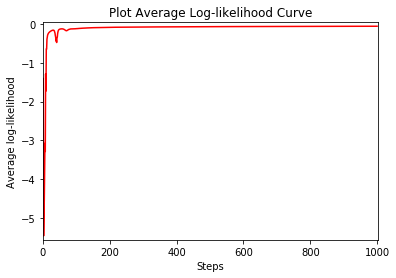

-0.0595475198261


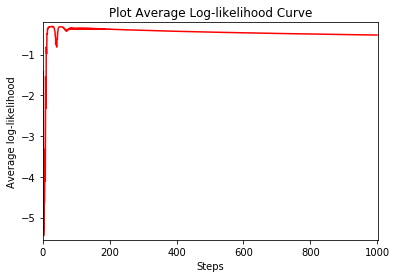

-0.521631972976
X: (1000, 2)  y: (1000,)    beta_rbf: (901,)


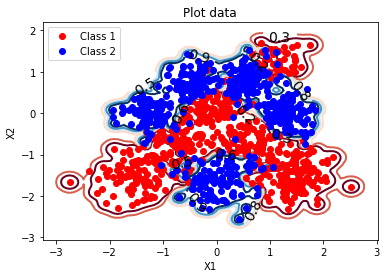

In [25]:
#g) Using radial basis functions to give a better fit to the data. 
l=0.1
Xtrain_expand = expand_inputs(l, Xtrain, Xtrain)
Xtest_expand = expand_inputs(l, Xtest, Xtrain)

X_tilde_train_expand = np.concatenate((Xtrain_expand, np.ones((Xtrain_expand.shape[0], 1))), 1)
X_tilde_test_expand = np.concatenate((Xtest_expand, np.ones((Xtest_expand.shape[0], 1))), 1)

print("ytrain: " + str(ytrain.shape) + "   Xtildetrainexpand: " +str(X_tilde_train_expand.shape) + "   ytest: " +str(ytest.shape) + "     X_tilde_test_expand" + str(X_tilde_test_expand.shape))
beta_RBF = train(ytrain, X_tilde_train_expand, ytest, X_tilde_test_expand, 0.05)
w = beta_RBF
#visualize the predictions 
print("X: " + str(X.shape) + "  y: " +str(y.shape) + "    beta_rbf: " + str(beta_RBF.shape))
plot_predictive_distribution(X, y, predict_for_plot_expanded_features)

In [9]:
#h) Report the  final training and test log-likelihoods per datapoint (just do the probabilities per datapoint), 
# and the 2 × 2 confusion matrices for the three models trained in part (g)
confusion_matrix(ytrain, X_tilde_train_expand, beta_RBF)

445.0
Fraction of true negative:
[ 0.97582418]
Fraction of true positive
0.977528089888
Fraction of false positive
[ 0.02417582]
Fraciton of false negative
0.0224719101124


In [10]:
#h) confusion matrix for the test data 
confusion_matrix(ytest, X_tilde_test_expand, beta_RBF)

49.0
Fraction of true negative:
[ 0.82352941]
Fraction of true positive
0.897959183673
Fraction of false positive
[ 0.17647059]
Fraciton of false negative
0.102040816327
